<a href="https://colab.research.google.com/github/mainak8967/MACHINE_LEARNING/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
house_price_data=pd.read_csv('/content/BostonHousing.csv')


In [ ]:
house_price_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
house_price_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

Understanding the Correlation between various features in the dataset
1.Positive Correlation
2.Negative Correlation

In [ ]:
correlation=house_price_data.corr()

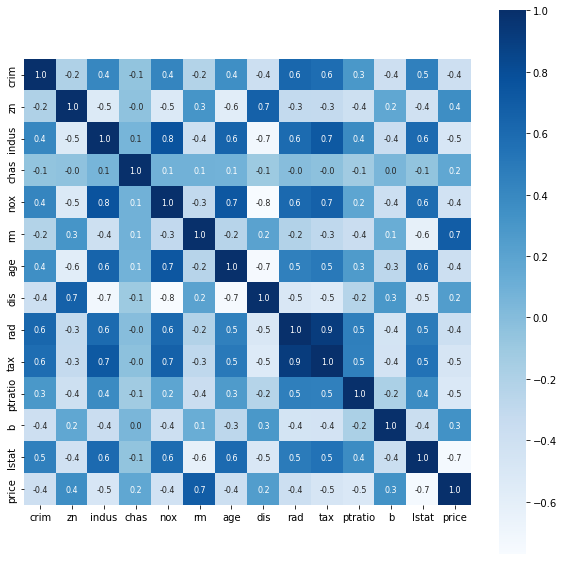

In [ ]:
#constructing heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
x=house_price_data.drop(columns='price',axis=1)
y=house_price_data['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
model=XGBRegressor()
model.fit(x_train,y_train)

[15:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [ ]:
#prediction on training data
training_data_prediction=model.predict(x_train)

In [ ]:
#R squared error
score_1=metrics.r2_score(y_train,training_data_prediction)#r2=r square

#Mean Absolute Error
score_2=metrics.mean_absolute_error(y_train,training_data_prediction)
print("R Squared Error=", score_1)
print("Mean Absolute Error=",score_2)

R Squared Error= 0.9748911529344064
Mean Absolute Error= 1.095920478235377


In [ ]:
#values are close to 0 so good model, if it had been around 5 or 10 then bad model

Visualising actual prices and predicted prices

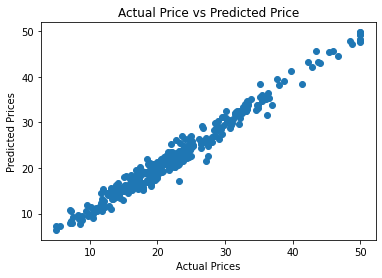

In [ ]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
|#prediction on test data
print("R-Squared Error=",metrics.r2_score(y_test,model.predict(x_test)))
print("Mean Absolute Error=",metrics.mean_absolute_error(y_test,model.predict(x_test)))

R-Squared Error= 0.9196210387570751
Mean Absolute Error= 2.2178991551492726


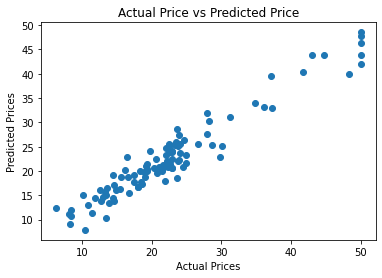

In [ ]:
#lets visualise this one
plt.scatter(y_test,model.predict(x_test))
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()